## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
%matplotlib inline
#plots displayed inline
import tensorflow as tf #dl framework
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss']) #calculates the number of training epochs by checking the length of the loss array
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1) #Sets up the first subplot for accuracy (1 row, 2 columns, first plot)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training') #accuracy plot
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2) #for second plot
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training') #loss plot
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true') #normalized to represent proportions instead of raw counts, easier for imbalaced dataset

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm) #Displays the confusion matrix as a color-coded grid.
    #x-axis is predicted class and y-axis is true class
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx) #Displays a color bar to indicate the range of proportions (e.g., 0.0 to 1.0).
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.17.1


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
from datasets import load_dataset #hugging faces datset

dataset= load_dataset("emotion")
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
train= dataset["train"]
val= dataset["validation"]
test= dataset["test"]

In [ ]:
def get_tweet(data):   #x = {'text': 'i didnt feel humiliated', 'label': 0}
  label_names= data.features["label"].names

  tweets= [x["text"] for x in data]
  labels= [label_names[x["label"]] for x in data]
  return tweets, labels

In [ ]:
tweets, labels= get_tweet(train)

In [ ]:
tweets[65], labels[65]

('i feel selfish as i read back to my former posts how i have never asked for prayers for others how i never considered that there may be others out there that deserve their prayers answered before my own',
 'anger')

## Task 4: Tokenizer

1. Tokenizing the tweets (converting words to tokens and then numbers)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer= Tokenizer(num_words= 10000, oov_token= "<UNK>") # the 10000 most frequently occuring words and rest are put in out of vocabulary with unknown token
tokenizer.fit_on_texts(tweets) #more freq words get less indices

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

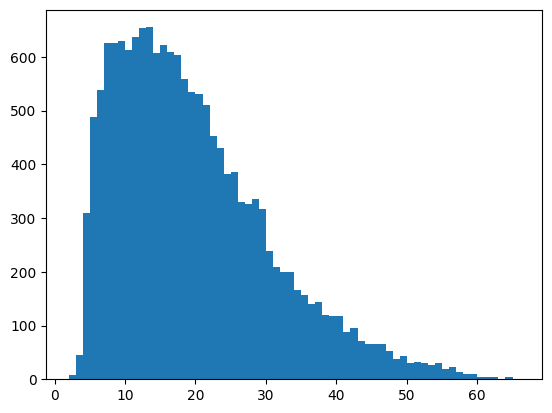

In [ ]:
lengths= [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins= len(set(lengths))) #bins is number of intervals, set(lengths) converts list into unique tweet lengths
plt.show()
#lengths = [4, 5, 6, 3, 4]
#set(lengths)  # {3, 4, 5, 6}
#len(set(lengths))  # 4 (number of unique tweet lengths)

In [ ]:
maxlen= 50 #if any tweet more than this it is truncated and less than this will be padded with zeroes
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences= tokenizer.texts_to_sequences(tweets)
  padded= pad_sequences(sequences, truncating= "post", padding= "post", maxlen= maxlen)
  return padded

In [ ]:
padded_train_seq= get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes= set(labels)
print(classes)

{'surprise', 'sadness', 'fear', 'joy', 'love', 'anger'}


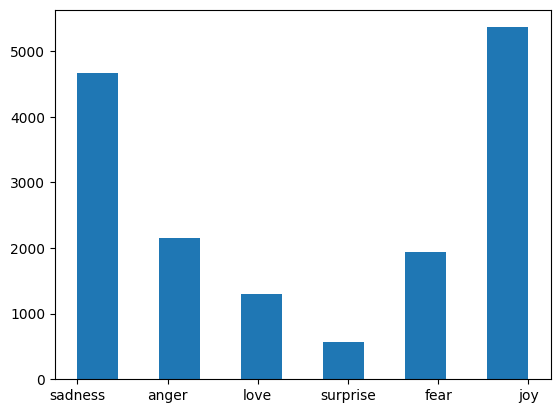

In [ ]:
plt.hist(labels, bins= 11)
plt.show()

In [ ]:
class_to_index= dict((c,i) for i, c in enumerate(classes))
class_to_index

{'surprise': 0, 'sadness': 1, 'fear': 2, 'joy': 3, 'love': 4, 'anger': 5}

In [ ]:
index_to_class= dict((v, k) for k, v in class_to_index.items())
index_to_class

{0: 'surprise', 1: 'sadness', 2: 'fear', 3: 'joy', 4: 'love', 5: 'anger'}

In [ ]:
names_to_ids= lambda labels: np.array([class_to_index.get(x) for x in labels])
train_labels= names_to_ids(labels)
print(train_labels[0])

#class_to_index = {"sadness": 0, "joy": 1, "love": 2, "anger": 3, "fear": 4, "surprise": 5}
#labels = ["joy", "anger", "sadness"]
#result = [class_to_index.get(x) for x in labels]
# result = [1, 3, 0]
#np.array([1, 3, 0])  # array([1, 3, 0])

1


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
#model is defined using the Sequential API, which allows stacking layers one after another in a linear fashion. Each layer processes the output of the previous layer, transforming it and passing it forward.
model= tf.keras.models.Sequential([
       tf.keras.layers.Embedding(10000, 16, input_length= maxlen), #converts input tokens into dense vector representations, each word is represented as vector of numbers of size 16(called embeddings)
       #10000: The size of the vocabulary (top 10,000 most frequent words).
       #16: The embedding dimension — each word is represented as a vector of size 16.
       #input_length=maxlen: The length of input sequences (after padding).
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences= True)), #lstm is long short term memory, type of Recurrent Neural Network (RNN) that captures sequential information, helps the model remember important parts of a tweet while processing the whole text.
       #bidirectional layer to process input seq in both forward and backward directions in the sequence to understand full context
       #20 is the neurons/ lstm units, each unit learns a representation of the sequence, o/p is 40 bcos bidirectional
       #outputs a sequence of information (like clues for each word in the tweet) for the next layer to analyze further instead of a single vector
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)), # outputs a single vector summarizing the sequence, focus on the overall meaning of the tweet rather than just word-by-word clues. o/p is 20
       tf.keras.layers.Dense(6, activation= "softmax") #computes the final output probabilities for each of the 6 emotion classes, "softmax" function assigns probabilities to each emotion, ensuring they add up to 1.
       #Example Output: [0.1, 0.05, 0.7, 0.05, 0.05, 0.05], where the highest value (0.7) indicates the predicted emotion.
])

model.compile(loss= "sparse_categorical_crossentropy", optimizer= "adam", metrics= ["accuracy"])
#loss function is sparse bcos labels are integers and not one hot encoded, measures how well the predicted probabilities match the true labels.
#optimizer adam adjusts learning rates during training, combining features of momentum and RMSProp optimizers.
#accuracy Tracks the proportion of correctly classified samples during training.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels= get_tweet(val)
val_seq= get_sequences(tokenizer, val_tweets)
val_labels= names_to_ids(val_labels)

In [ ]:
val_tweets[1], val_labels[1]

('i feel like i am still looking at a blank canvas blank pieces of paper', 1)

In [ ]:
h= model.fit(
    padded_train_seq, train_labels,
    validation_data= (val_seq, val_labels),
    epochs= 20,
    callbacks= [tf.keras.callbacks.EarlyStopping(monitor= "val_accuracy", patience= 2)] #stop if model accuracy is not improving after 2 epochs
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3493 - loss: 1.5555 - val_accuracy: 0.7055 - val_loss: 0.8602
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7853 - loss: 0.6438 - val_accuracy: 0.8005 - val_loss: 0.6115
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8705 - loss: 0.3908 - val_accuracy: 0.8315 - val_loss: 0.5270
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9052 - loss: 0.2850 - val_accuracy: 0.8335 - val_loss: 0.5099
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9249 - loss: 0.2227 - val_accuracy: 0.8535 - val_loss: 0.4733
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9488 - loss: 0.1656 - val_accuracy: 0.8640 - val_loss: 0.4424
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9581 - loss: 0.1351 - val_accuracy: 0.8780 - val_loss: 0.4414
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9670 - loss: 0.1111 - val_a

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

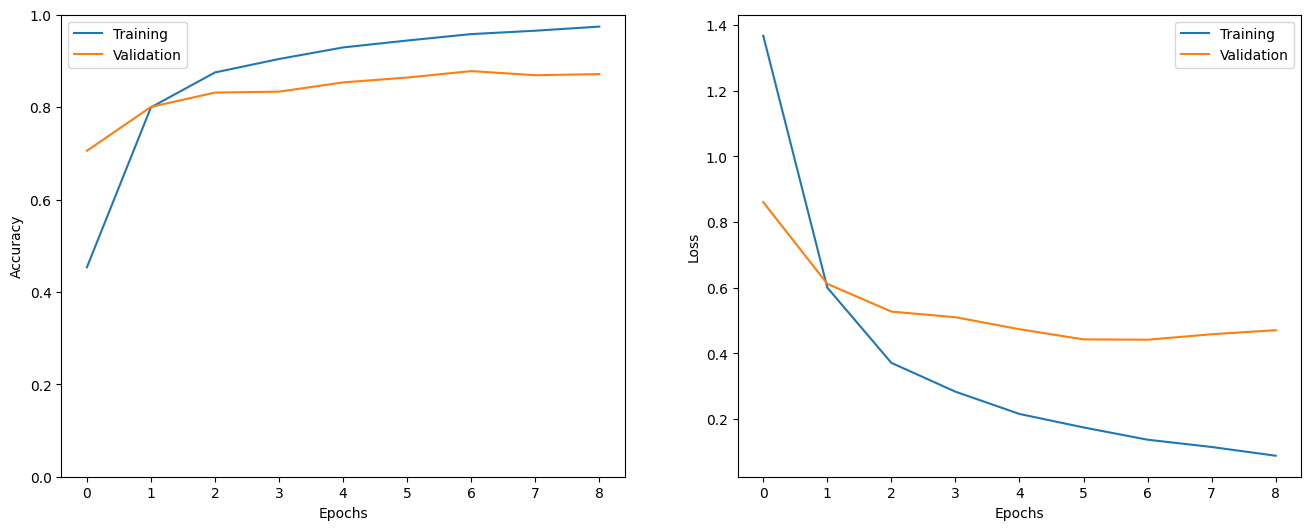

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels= get_tweet(test)
test_seq= get_sequences(tokenizer, test_tweets)
test_labels= names_to_ids(test_labels)

In [ ]:
res= model.evaluate(test_seq, test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8701 - loss: 0.4505


In [ ]:
i= random.randint(0, len(test_labels)-1) #chooses a random number for test sample
print("sentence: ", test_tweets[i])
print("label: ", index_to_class[test_labels[i]])

#model expects data in batches—a group of tweets. Even if you're predicting for just one tweet(batch size will be 1)

p=model.predict(np.expand_dims(test_seq[i], axis=0))[0] #Adds an extra dimension to the sequence, bcos the model processes inputs in batches and axis=0 adds new dim at start of array
#If test_seq[i] is [4, 56, 102, 3, 0, 0] shape is (6, ) then changes it into [[4, 56, 102, 3, 0, 0]] shape is (1,6), o/p is p = [[0.05, 0.1, 0.65, 0.1, 0.05, 0.05]] & [0] discards the batch dimension
pred_class= index_to_class[np.argmax(p).astype("uint8")] #index of highest prob is found using np.argmax, converts the index to an unsigned 8-bit integer and then converts it to class
print("predicted emotion: ", pred_class)

sentence:  im feeling rather angsty and listless
label:  sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted emotion:  sadness


In [ ]:
preds= np.argmax(model.predict(test_seq), axis=1)
#[[0.1, 0.2, 0.7],    Probabilities for Tweet 1
# [0.3, 0.4, 0.3],    Probabilities for Tweet 2
# [0.05, 0.05, 0.9]]  Probabilities for Tweet 3 is o/p of model.predict then max prob for each row is given and stored in preds, axis=1 means operate along the columns for each row
#o/p is [2,1,2]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


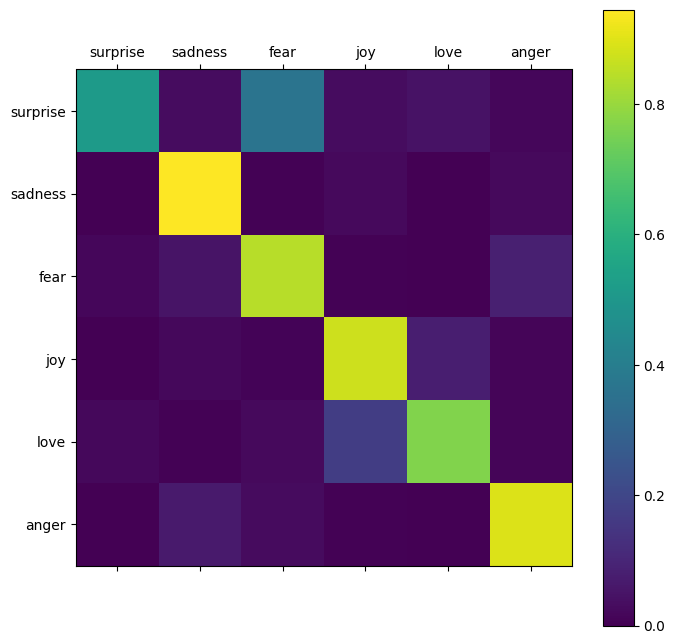

In [ ]:
show_confusion_matrix(test_labels, preds, list(classes))